# Why Employees Cause Attrition?

## This analysis consists of three parts.
1. Expore data distribution.
3. Predict Attrition using machine learning methods.

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Output plots in notebook
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

WA_Fn-UseC_-HR-Employee-Attrition.csv



# 1. Expore data distribution

In [2]:
Data = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")
Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Target  is "Attrition".

In [3]:
Data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

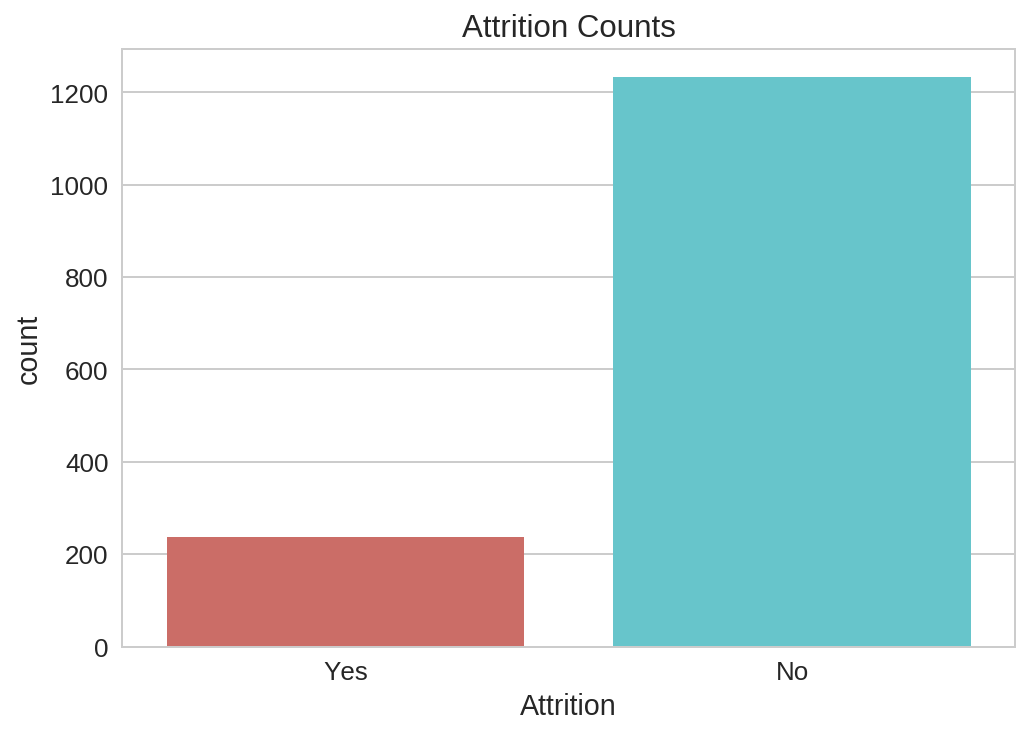

In [4]:
# sns.set(style="whitegrid", font_scale=1.3)
# sns.countplot(x="Attrition", data=Data, palette="hls")
# sns.plt.title("Attrition Counts")

#### The employees who cause Attrition are 200 / 1400 of the whole.

### First of all, check the distribution of data.

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

#### As there are numeric type attributes and character string attributes, we should separate them.

In [6]:
# columns name list
cols = Data.columns
num_cols = Data._get_numeric_data().columns
cat_cols = cols.drop(num_cols.tolist())

### Numeric type attributes

In [7]:
print(num_cols)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [8]:
Data[num_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### EmployeeCount, EmployeeNumber and StandardHours don't make sense. So we delete them.

In [9]:
Data.drop(["EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1, inplace=True)

### Character string attributes

#### check each category values

In [10]:
for cat_col in cat_cols:
    display(Data[cat_col].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Y    1470
Name: Over18, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

* "Attrition", "Gender" and "OverTime" are binary variables. We convert them into 0 or 1 numerical data by using dummy variables.
* "MaritalStatus" is three value variable. We classify it as "Married" and others, and convert it into 0 or 1 numerical data.
* "BusinessTravel" represent the frequency of three stages. We convert it into numerical ordinal data.
* "Department" and "JobRole" are similar variables. We unify them to "Department_JobRole" variable.
* The value of "Over18" is all "Y". As it doesn't make sense, we delete it.

In [11]:
# make Business_Travel
Data["Business_Travel"] = Data["BusinessTravel"].map({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2})

# make Dapartment_JobRole
Data["Department_JobRole"] = Data["Department"] + " : " + Data["JobRole"]
# make binary data
Data["MaritalStatus_Married"] = pd.get_dummies(Data["MaritalStatus"])["Married"]
Data = pd.concat([Data, pd.get_dummies(Data[["Gender", "OverTime", "Attrition"]], drop_first=True)], axis=1)

# drop 
Data.drop(["BusinessTravel", "Department", "JobRole", "MaritalStatus", "Gender", "OverTime", "Attrition", "Over18"], axis=1, inplace=True)

#### Again, classify each attribute.

In [12]:
Data.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel,Department_JobRole,MaritalStatus_Married,Gender_Male,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,Life Sciences,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,Sales : Sales Executive,0,0,1,1
1,49,279,8,1,Life Sciences,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,2,Research & Development : Research Scientist,1,1,0,0
2,37,1373,2,2,Other,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,Research & Development : Laboratory Technician,0,1,1,1
3,33,1392,3,4,Life Sciences,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,2,Research & Development : Research Scientist,1,0,1,0
4,27,591,2,1,Medical,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,Research & Development : Laboratory Technician,1,1,0,0


In [13]:
cols = Data.columns
num_cols = Data._get_numeric_data().columns
cat_cols = cols.drop(num_cols.tolist())

In [14]:
print("Numeric data\n", num_cols)
print("Categorical data\n", cat_cols)

Numeric data
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Business_Travel',
       'MaritalStatus_Married', 'Gender_Male', 'OverTime_Yes',
       'Attrition_Yes'],
      dtype='object')
Categorical data
 Index(['EducationField', 'Department_JobRole'], dtype='object')


### Data conversion has been completed. We observe the correlation coefficient of each numerical data.

#### Checking the correlation coefficient, we can find what kind of variables are related deeply.

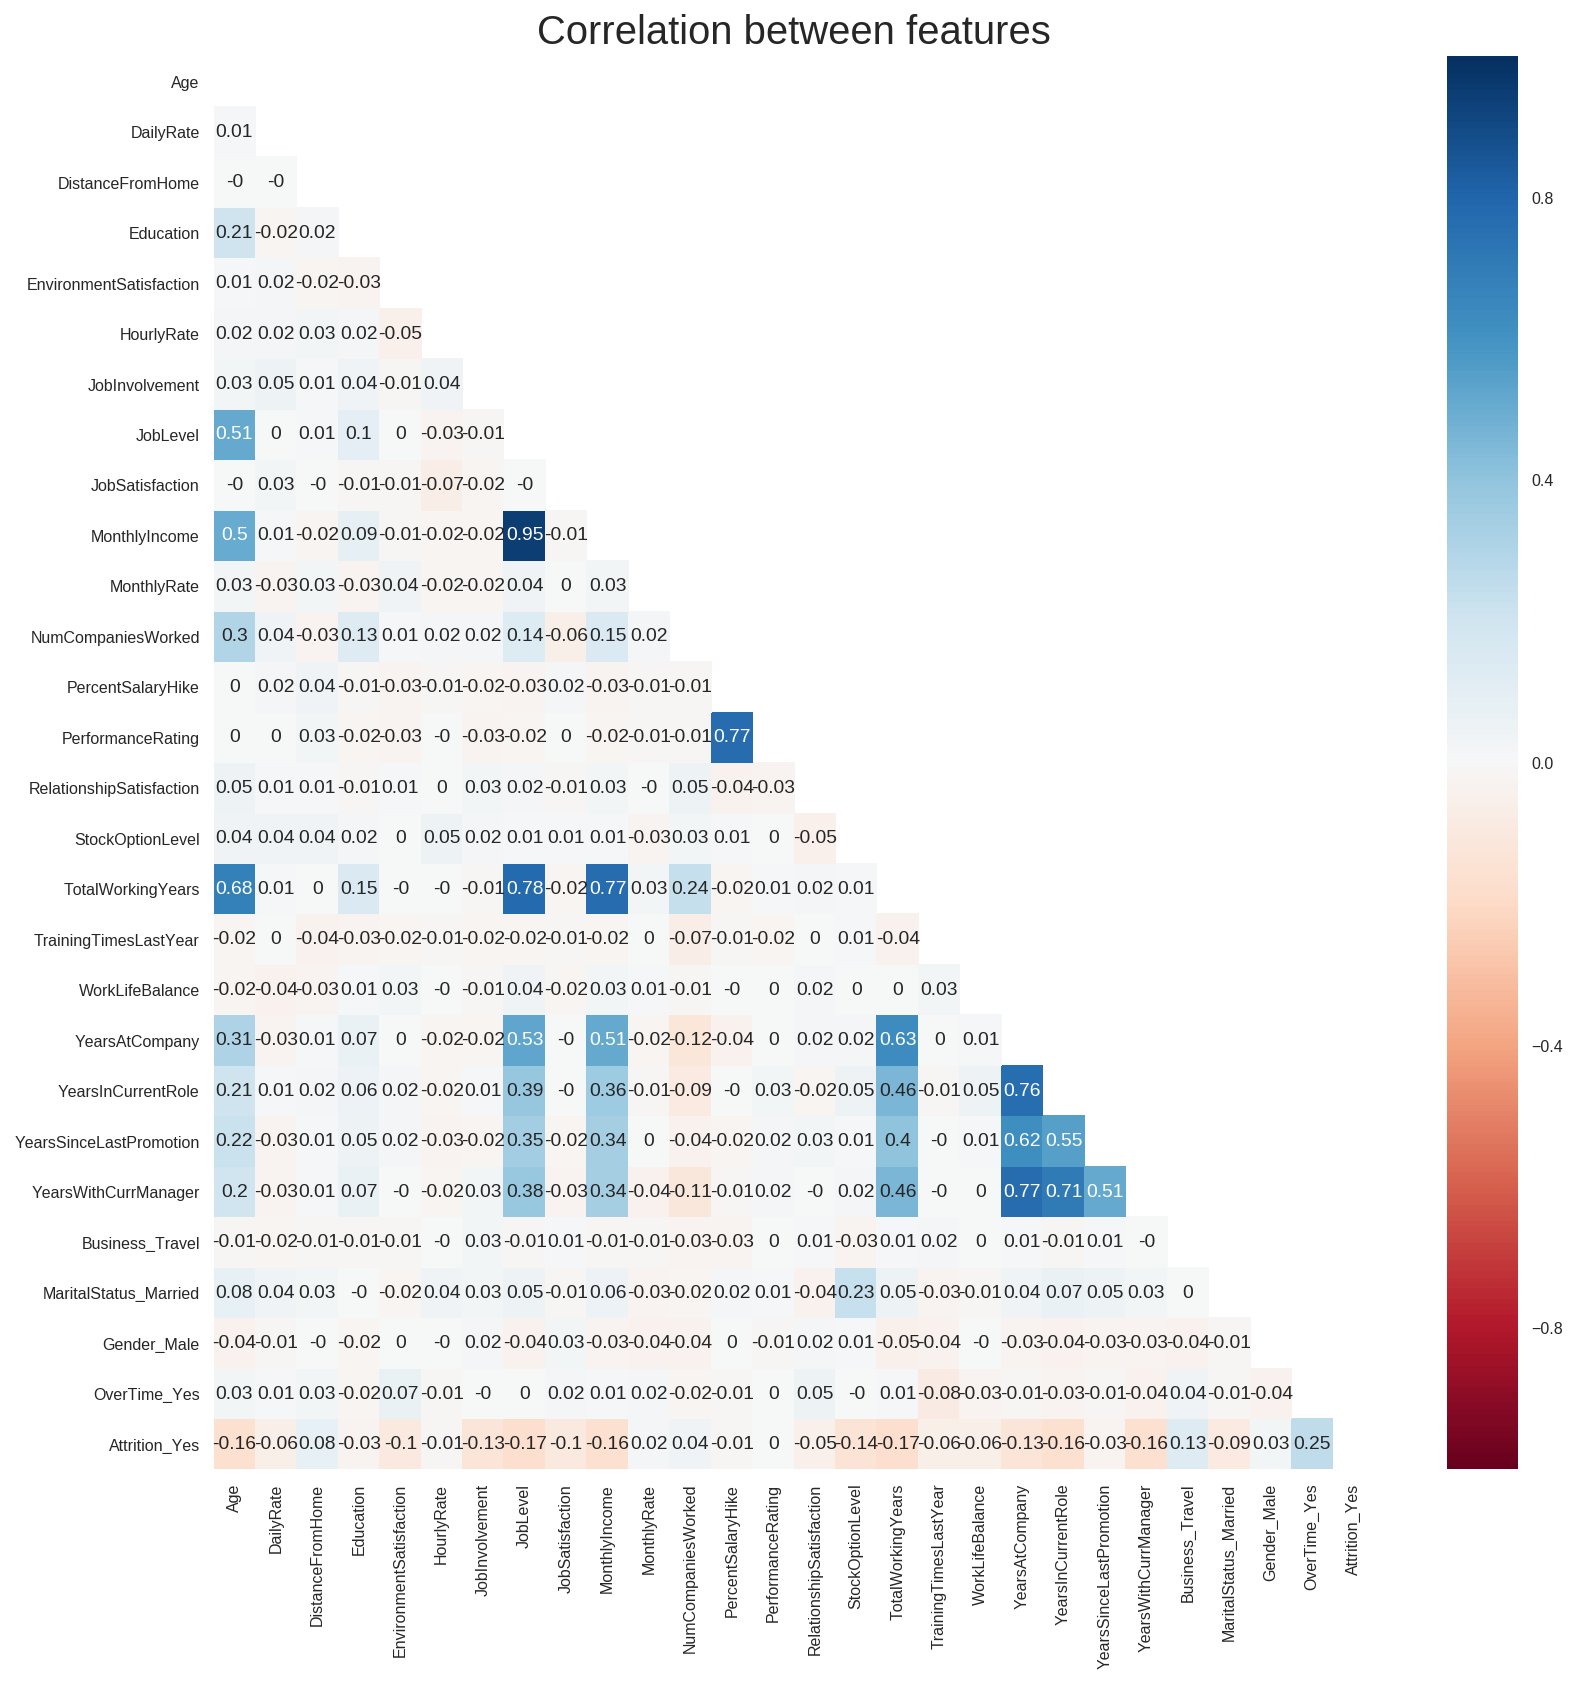

In [15]:
# sns.set(style="whitegrid", font_scale=0.8)
# plt.figure(figsize=(13,13))
# corr = round(Data.corr(),2)
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr, annot=True, cmap="RdBu", mask=mask, )
# plt.title("Correlation between features", fontdict={"fontsize":20})

### As there are many variables, we extract and visualize only strong correlation coefficient attributes.

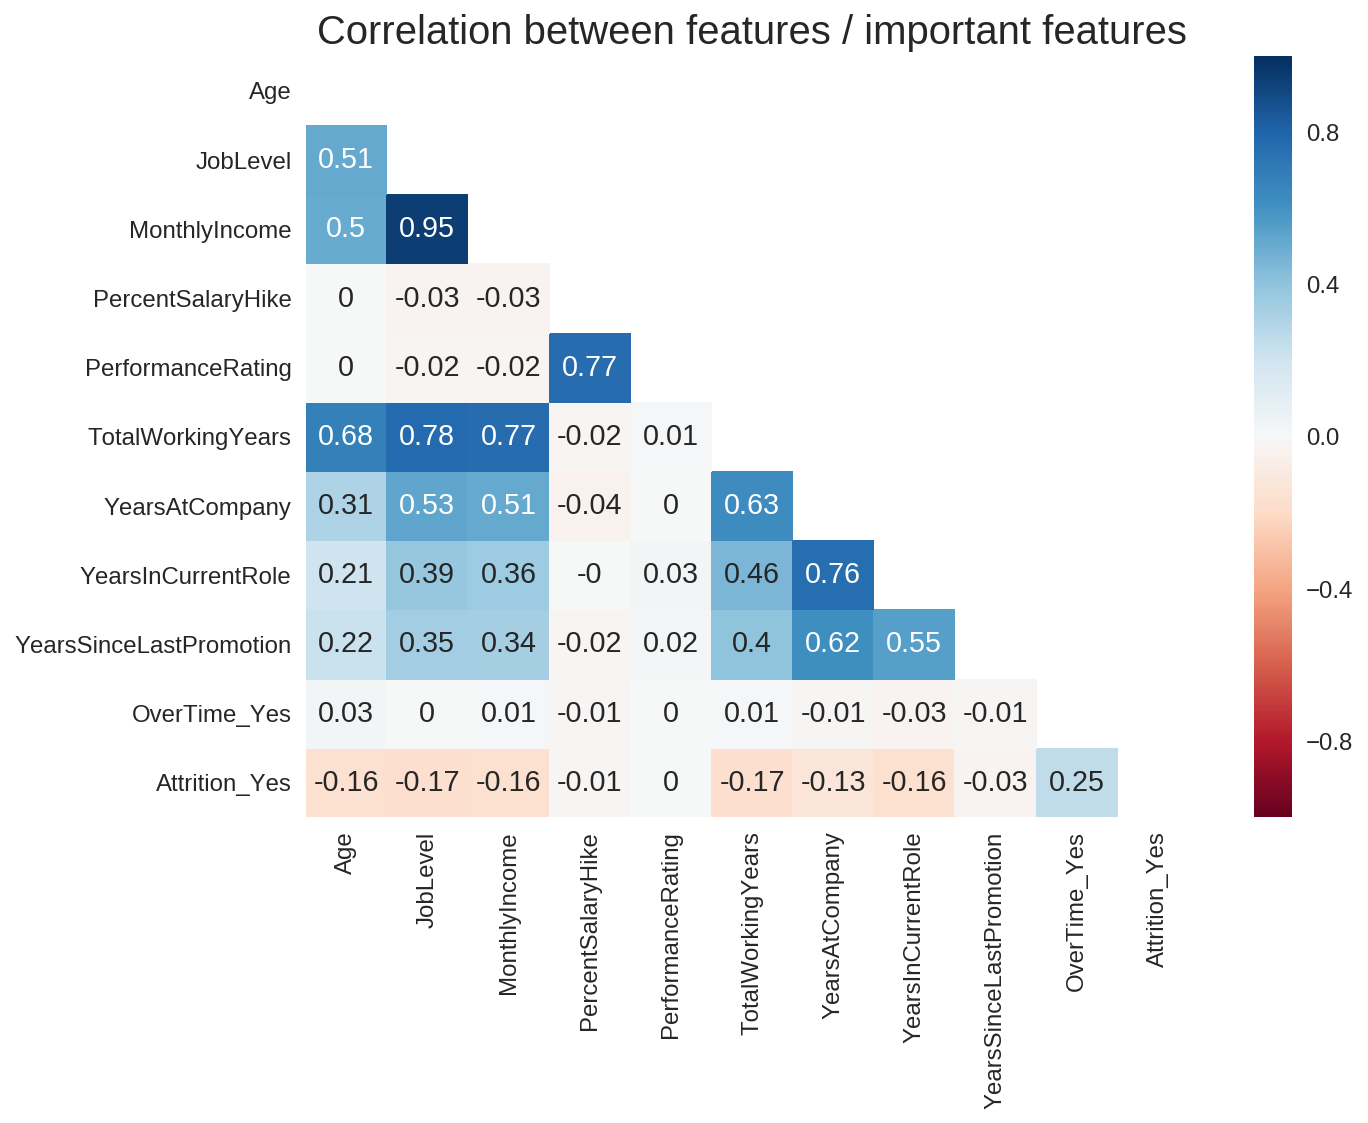

In [16]:
# extract_cols  = ["Age", "JobLevel", "MonthlyIncome", "PercentSalaryHike", "PerformanceRating", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole","YearsSinceLastPromotion", "OverTime_Yes", "Attrition_Yes"]
# sns.set(style="whitegrid", font_scale=1.2)
# plt.figure(figsize=(10,7))
# corr = round(Data[extract_cols].corr(),2)
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr, annot=True, cmap="RdBu", vmin=-1, vmax=1, mask=mask)
# plt.title("Correlation between features / important features", fontdict={"fontsize":20})

### The employee whose Age, JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCopany and YearsCurrentRole are low tend to cause Attrition.
* Young and low income employee
* As "OverTime_Yes" is positive correlation, busy employees tend to cause Attrition.

### Long-time employee has high JobLevel and MonthlyIncome.
* On the other hand, "PerformanceRating" is not related with JobLevel and MonthlyIncome.
* Althrough employees would be evaluated by contents of work, MonthlyIncome is correlated with working years.
* So young employees at this company tend to cause Attrition.

### Next we observe the differience of data disribution in attrition_yes or not.

#### standarize data to comapre easily.

In [17]:
Data_copy = Data.copy()
scale_cols = Data_copy.columns.drop(["Department_JobRole", "EducationField", "Attrition_Yes"])
Data_copy[scale_cols] = (Data_copy[scale_cols] - Data_copy[scale_cols].mean()) / Data_copy[scale_cols].std()

#### check how variables are dispersed by Attrition_Yes

In [18]:
Att = Data_copy.groupby(["Attrition_Yes"], as_index=False).mean().transpose()
Att.head()

,0,1
Attrition_Yes,0.000000,1.000000
Age,0.069775,-0.363008
DailyRate,0.024829,-0.129174
DistanceFromHome,-0.034152,0.177676
Education,0.013750,-0.071534


#### make pandas frame to plot using seaborn library

In [19]:
Att_sep = [Att[[x]] for x in range(len(Att.columns))]
Att_plot = pd.DataFrame([], columns=["mean", "feature","kind"])
for (i,data) in enumerate(Att_sep):
    data["feature"] = data.index
    data["kind"] = "Attrition_Yes_" + data.loc["Attrition_Yes"].astype(str).values[0]
    data.rename(columns={i:"mean"}, inplace=True)
    data.drop(["Attrition_Yes"], axis=0, inplace=True)
    Att_plot = pd.concat([Att_plot, data], axis=0)

#### prepare some clusters to comapre easily

In [20]:
# organize features
features_1 = ["Age","Gender_Male","MaritalStatus_Married","Education","DistanceFromHome","NumCompaniesWorked"]
features_2 = ["JobInvolvement","JobLevel","JobSatisfaction","EnvironmentSatisfaction",
              "RelationshipSatisfaction", "WorkLifeBalance", "Business_Travel", "OverTime_Yes",]
features_3 = ["HourlyRate","DailyRate","MonthlyRate","MonthlyIncome",
              "PercentSalaryHike","StockOptionLevel","PerformanceRating"]
features_4 = ["TotalWorkingYears","YearsAtCompany","YearsInCurrentRole","YearsWithCurrManager","YearsSinceLastPromotion","TrainingTimesLastYear"]
# make pandas frame for plot
features = [features_1, features_2, features_3, features_4]
Att_plot = Att_plot.loc[features_1 + features_2 + features_3 + features_4]

#### plot function

In [21]:
# def feature_plot(input_data, title, palette="hls", size=4, aspect=3, rotation=0, ylim=None):
#     ax = sns.factorplot(x="feature", y="mean", hue="kind", data=input_data, palette=palette, size=size, aspect=aspect)
#     ax.set(xlabel="", ylim=ylim)
#     ax.set_xticklabels(rotation=rotation)
#     plt.title(title, fontdict={"fontsize":17})
#     sns.despine(left=True, bottom=True)

#### plot graph

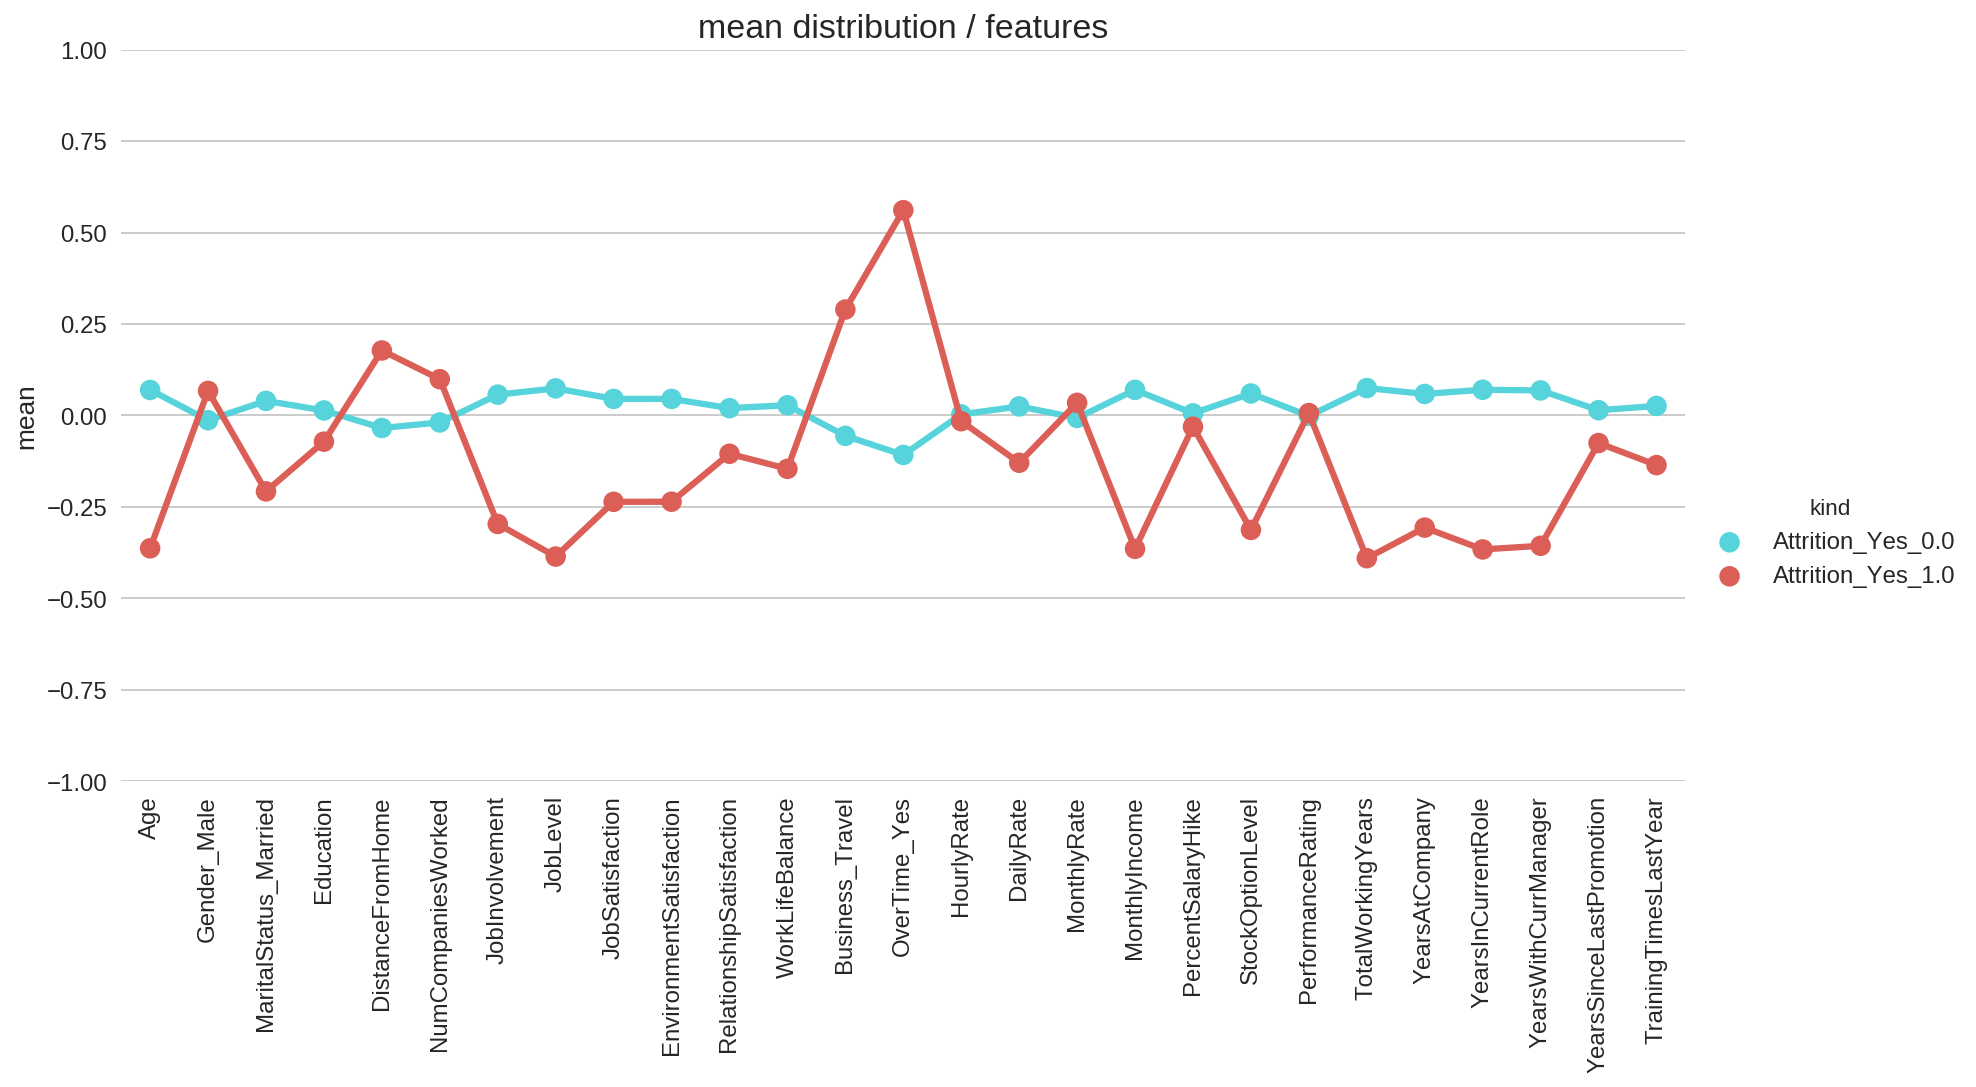

In [22]:
# sns.set(style="whitegrid", font_scale=1.2)
# feature_plot(input_data=Att_plot, palette=sns.color_palette("hls",2)[::-1], title="mean distribution / features", size=6, aspect=2, rotation=90, ylim=(-1,1))

### extract high correlation feature with Attrition_Yes

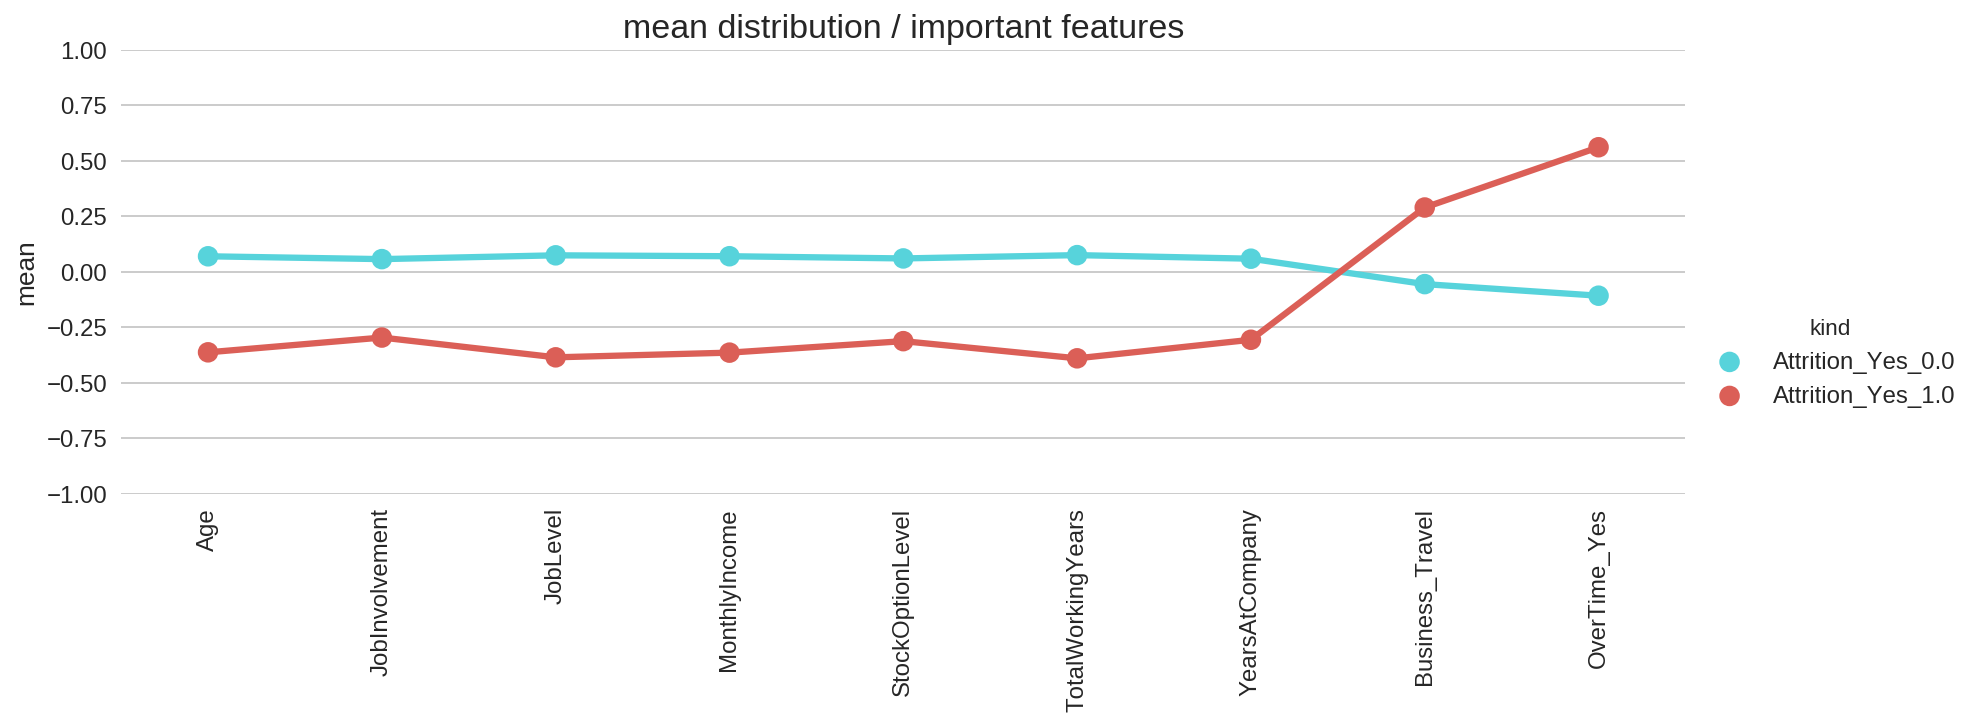

In [23]:
important_cols = ["Age", "JobInvolvement", "JobLevel", "MonthlyIncome", "StockOptionLevel", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrManager", "Business_Travel", "OverTime_Yes"]
# feature_plot(input_data=Att_plot.loc[important_cols], palette=sns.color_palette("hls",2)[::-1], title="mean distribution / important features", size=4, aspect=3, rotation=90, ylim=(-1,1))

#### The most different feature is "OverTime_Yes"
* High value of "Business_Travel" and "OverTime_Yes" cause Attrition.

#### Employees who get attrition are young and not long-time employees.
* "JobLevel", "JobInvolvment" and "JobSatisfaction" are low.
* They are not matured to job. 

#### Monthly income of employee who get attrition are low.
* "MonthlyIncome" and "StockOptionLevel" are low.

### Next we observe distribution by separating categorical variables.

In [24]:
print(cat_cols)

Index(['EducationField', 'Department_JobRole'], dtype='object')


# Education Field

In [25]:
Data_copy["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [26]:
# replace long word to short word.
Data_copy["EducationField"].replace({"Life Sciences":"LifeSc", "Technical Degree":"Technical", "Human Resources":"HR"}, inplace=True)

#### First, check propotion of Attrition in each EducationField

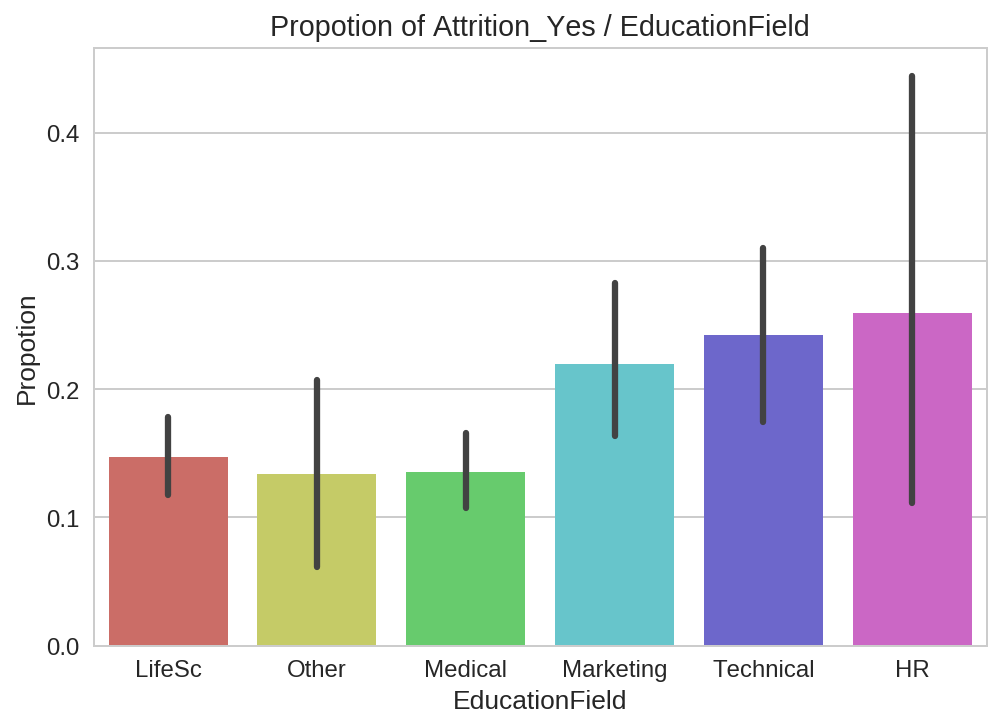

In [27]:
# ax = sns.barplot(x="EducationField", y="Attrition_Yes", data=Data_copy, palette="hls")
# ax.set_ylabel("Propotion")
# sns.plt.title("Propotion of Attrition_Yes / EducationField")

#### The employee who study HR, Technical Degree and Marketing tend to get Attrition.
* HR is high standard deviation as there are only 27 employees.

#### The employees of Life Sciences and Medical are large in the whole. But they don't tend to get Attrition.

### check mean distibution of each EducationFiled.

In [28]:
Education_Att = Data_copy.groupby(["EducationField", "Attrition_Yes"], as_index=False).mean()
Education_Att = Education_Att[Education_Att["Attrition_Yes"] == 1].transpose()
Education_Att.head()

,1,3,5,7,9,11
EducationField,HR,LifeSc,Marketing,Medical,Other,Technical
Attrition_Yes,1,1,1,1,1,1
Age,-0.726636,-0.263476,-0.276268,-0.38608,-0.499178,-0.562928
DailyRate,-0.33152,-0.201971,-0.213343,-0.0948268,0.0379978,0.0845285
DistanceFromHome,0.839718,0.114851,0.399175,0.228831,0.178102,-0.135535


In [29]:
Education_sep = [Education_Att[[x]] for x in Education_Att.columns]
Education_plot = pd.DataFrame([], columns=["mean", "feature", "kind"])
for (col,data) in zip(Education_Att.columns, Education_sep):
    data["feature"] = data.index
    data["kind"] = data.loc["EducationField"].values[0] + "_" + data.loc["Attrition_Yes"].astype(str).values[0]
    data.rename(columns={col:"mean"}, inplace=True)
    data.drop(["EducationField", "Attrition_Yes"], axis=0, inplace=True)
    Education_plot = pd.concat([Education_plot, data], axis=0)
Education_plots = [Education_plot.loc[x] for x in features]

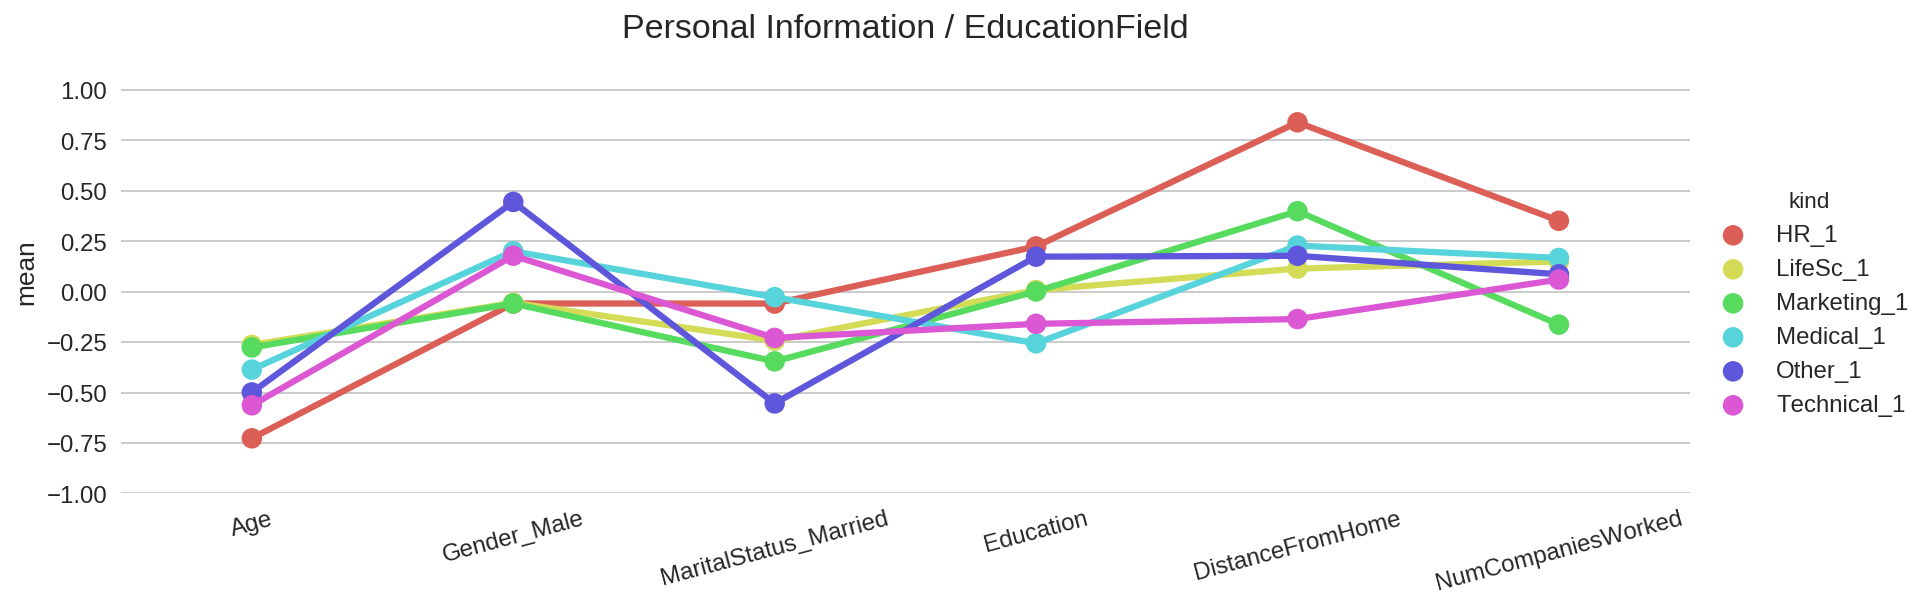

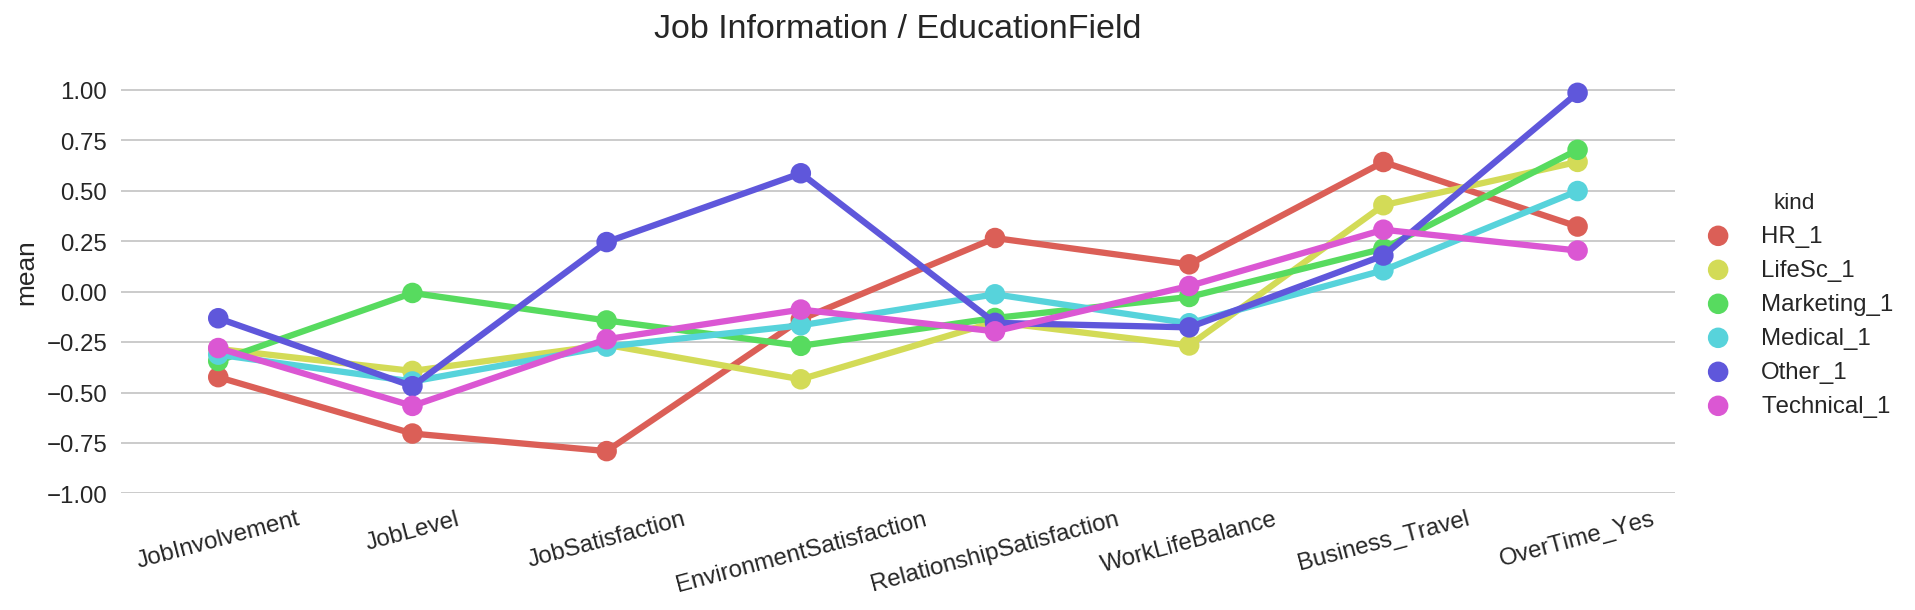

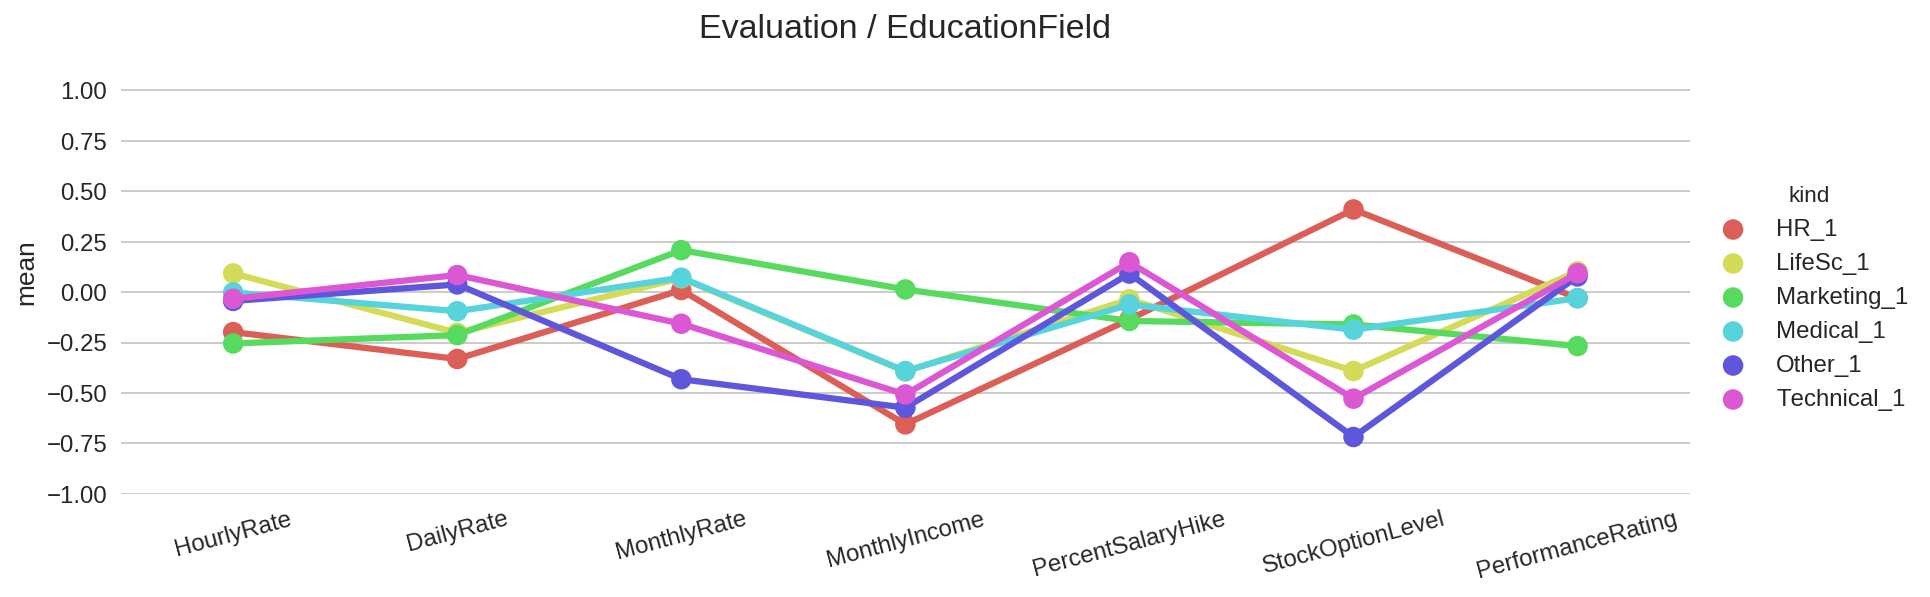

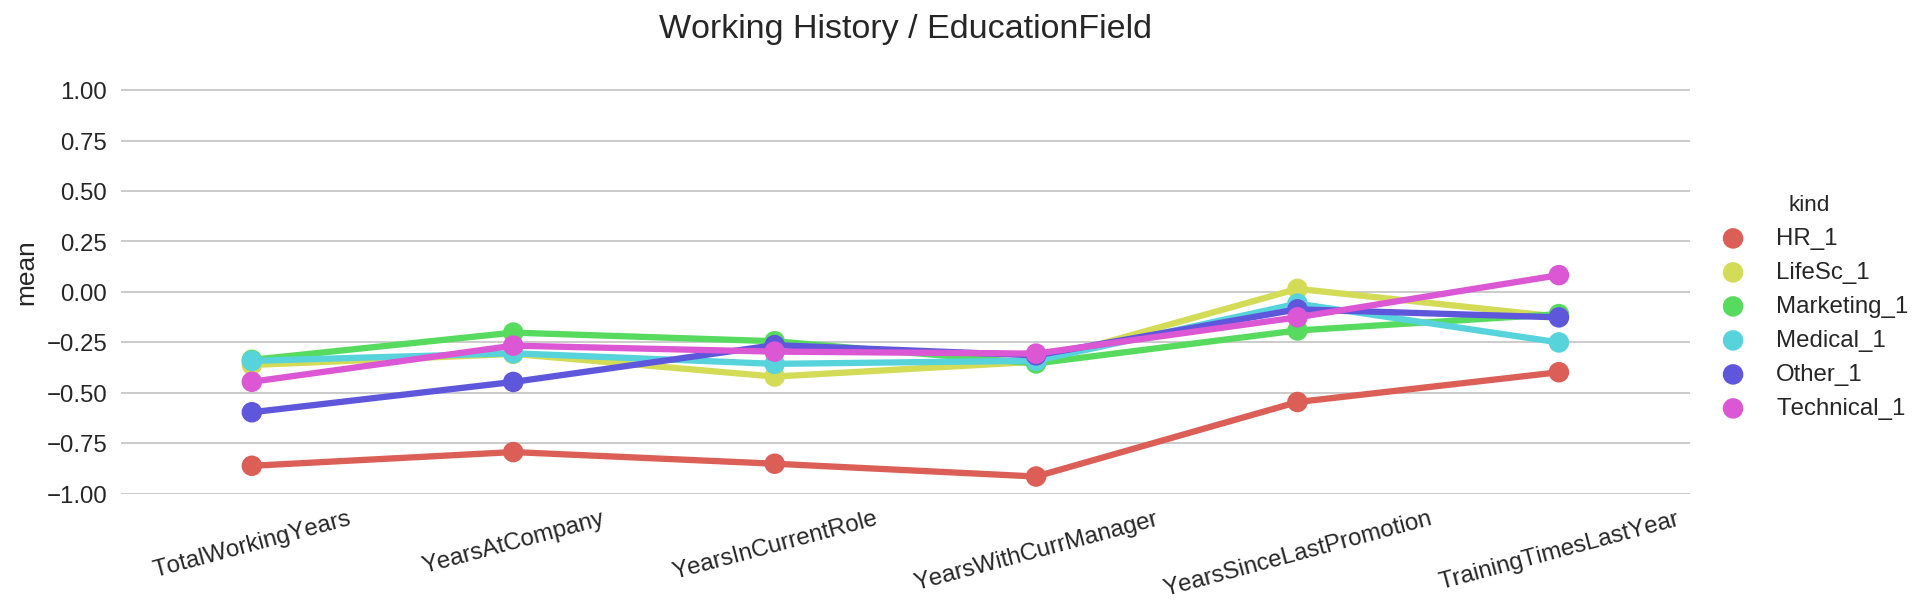

In [30]:
graph_titles = ["Personal Information / EducationField", "Job Information / EducationField", "Evaluation / EducationField", "Working History / EducationField"]
# for (i,title) in enumerate(graph_titles):
#     feature_plot(input_data=Education_plots[i], title=title, rotation=15, ylim=(-1,1.2))

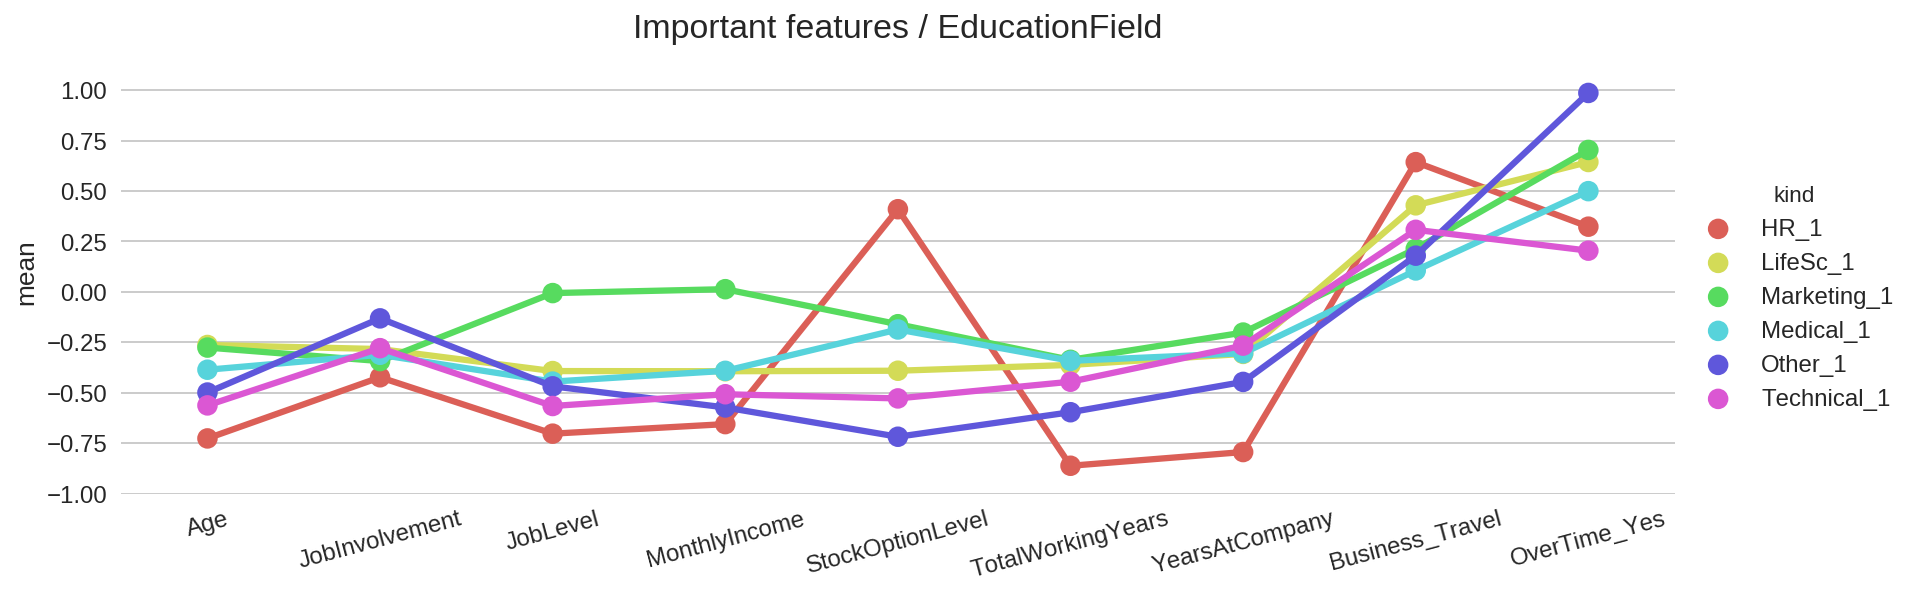

In [31]:
important_cols = ["Age", "JobInvolvement", "JobLevel", "MonthlyIncome", "StockOptionLevel", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrManager", "Business_Travel", "OverTime_Yes"]
# feature_plot(input_data=Education_plot.loc[important_cols], title="Important features / EducationField", size=4, aspect=3, rotation=15, ylim=(-1,1.2))

#### HR
* Working years variable is lower than other attributes.
* As there is High correlation between Working years and Income, their MonthlyIncome is low too.
* In addition, their Business_Travel is high. So they tend to get Attrition.

#### Technical Degree
* There are no notable attributes. But the mean value of important attributes are low on the whole.

#### Marketing
* JobLevel and MonghlyIncome are high mean. But OverTime_Yes is higher than other EducationFiled.

#### LifeScience, Medical
* Their mean value of important attributes are a little high on the whole.

# Department_JobRole

In [32]:
Data_copy["Department_JobRole"].value_counts()

Sales : Sales Executive                               326
Research & Development : Research Scientist           292
Research & Development : Laboratory Technician        259
Research & Development : Manufacturing Director       145
Research & Development : Healthcare Representative    131
Sales : Sales Representative                           83
Research & Development : Research Director             80
Research & Development : Manager                       54
Human Resources : Human Resources                      52
Sales : Manager                                        37
Human Resources : Manager                              11
Name: Department_JobRole, dtype: int64

In [33]:
# replace long word to short word.
Data_copy["Department_JobRole"].replace({"Sales : Sales Executive":"Sales : Executive",
                              "Sales : Sales Representative":"Sales : Representative",
                              "Sales : Manager":"Sales : Manager",
                              "Research & Development : Research Scientist":"R&D : RS",
                              "Research & Development : Laboratory Technician":"R&D : Lab",
                              "Research & Development : Manufacturing Director":"R&D : MD",
                              "Research & Development : Healthcare Representative":"R&D : Health",
                              "Research & Development : Research Director":"R&D : RD",
                              "Research & Development : Manager":"R&D : Manager",
                              "Human Resources : Human Resources":"HR : HR",
                              "Human Resources : Manager":"HR : Manager"}, inplace=True)

#### First, check propotion of Attrition in each JobRole

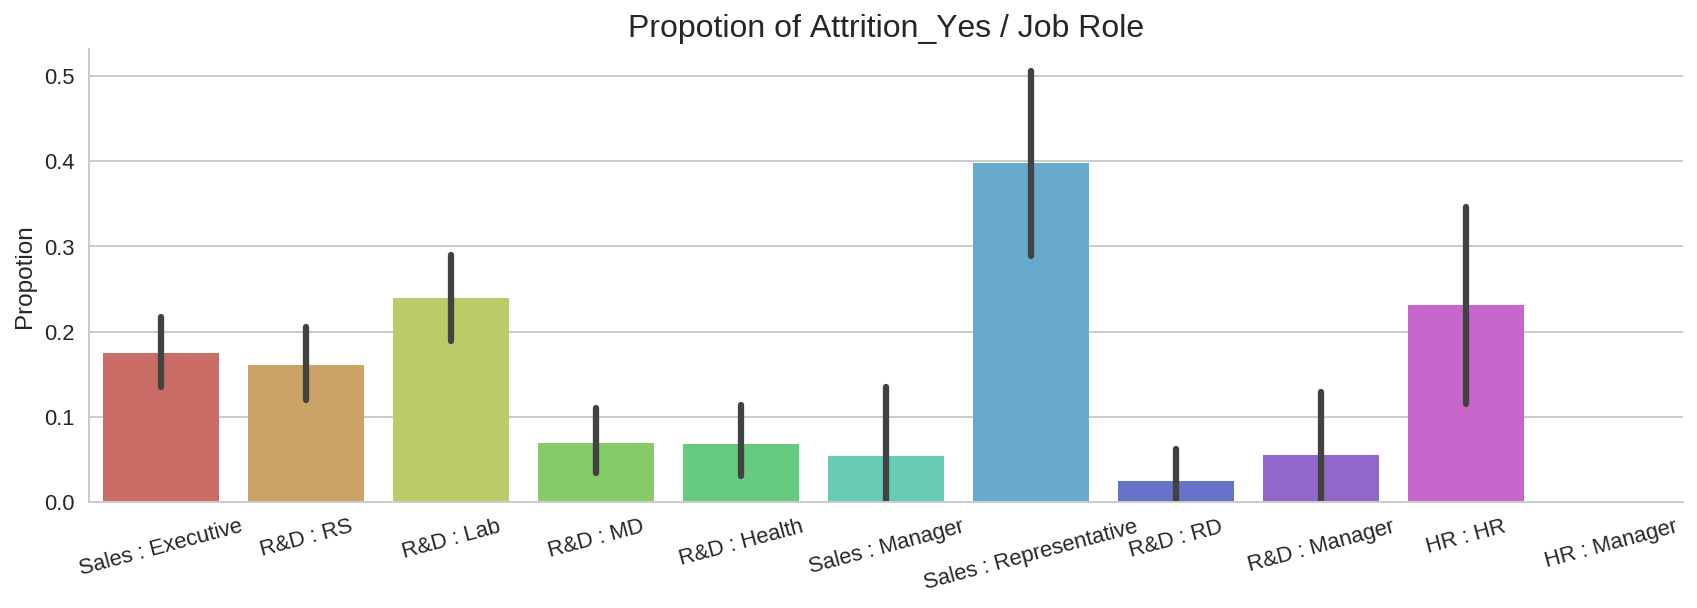

In [34]:
# sns.set(style="whitegrid", font_scale=1.1)
# ax = sns.factorplot(x="Department_JobRole", y="Attrition_Yes", kind="bar", data=Data_copy, size=4, aspect=3, palette="hls")
# ax.set(xlabel="", ylabel="Propotion")
# ax.set_xticklabels(rotation=15)
# plt.title("Propotion of Attrition_Yes / Job Role", fontdict={"fontsize":16})

#### Sales
* Propotion of representative is vert high. The propotion is smaller in order from manager, executive and representative.

#### R&D
* Lab is highest, and RS follow. Other jobroles are less likely to cause Attrition.

#### HR
* All 11 Manager don't get attrition. Propotion of other 52 HR is high.

#### Managing posts are not likely to cause Attrition. Young employees's post are likely to cause it.

In [35]:
JobRole_Att = Data_copy.groupby(["Department_JobRole", "Attrition_Yes"], as_index=False).mean()
JobRole_Att = JobRole_Att[JobRole_Att["Attrition_Yes"] == 1].transpose()
JobRole_Att.head()

,1,4,6,8,10,12,14,16,18,20
Department_JobRole,HR : HR,R&D : Health,R&D : Lab,R&D : MD,R&D : Manager,R&D : RD,R&D : RS,Sales : Executive,Sales : Manager,Sales : Representative
Attrition_Yes,1,1,1,1,1,1,1,1,1,1
Age,-0.74879,0.215107,-0.604308,0.260109,0.884057,1.37665,-0.483086,0.0640327,1.26718,-1.00006
DailyRate,-0.13028,-0.394421,0.000395151,-0.233417,0.215231,0.0508397,-0.227411,-0.139117,0.13634,-0.1695
DistanceFromHome,0.521058,1.04531,0.0578242,-0.0484179,0.757484,-0.270452,0.0707352,0.42638,-0.887213,-0.12841


In [36]:
JobRole_sep = [JobRole_Att[[x]] for x in JobRole_Att.columns]
JobRole_plot = pd.DataFrame([], columns=["mean", "feature", "kind"])
for (col,data) in zip(JobRole_Att.columns, JobRole_sep):
    data["feature"] = data.index
    data["kind"] = data.loc["Department_JobRole"].values[0] + "_" + data.loc["Attrition_Yes"].astype(str).values[0]
    data.rename(columns={col:"mean"}, inplace=True)
    data.drop(["Department_JobRole", "Attrition_Yes"], axis=0, inplace=True)
    JobRole_plot = pd.concat([JobRole_plot, data], axis=0)
JobRole_plots = [JobRole_plot.loc[x] for x in features]

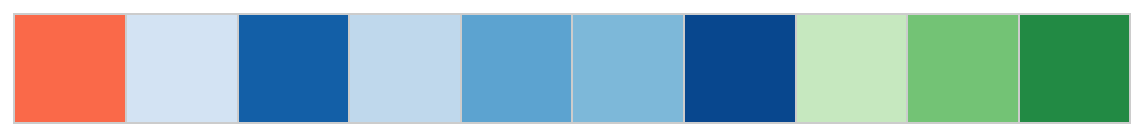

In [37]:
# # make color palette
# HR_color = sns.color_palette("Reds",1)
# RD_color = sns.color_palette("Blues", 10)
# RD_color_sorted = [RD_color[1], RD_color[8], RD_color[2], RD_color[5], RD_color[4], RD_color[9]]
# Sales_color = sns.color_palette("Greens", 3)
# job_color = HR_color + RD_color_sorted + Sales_color
# sns.palplot(job_color)

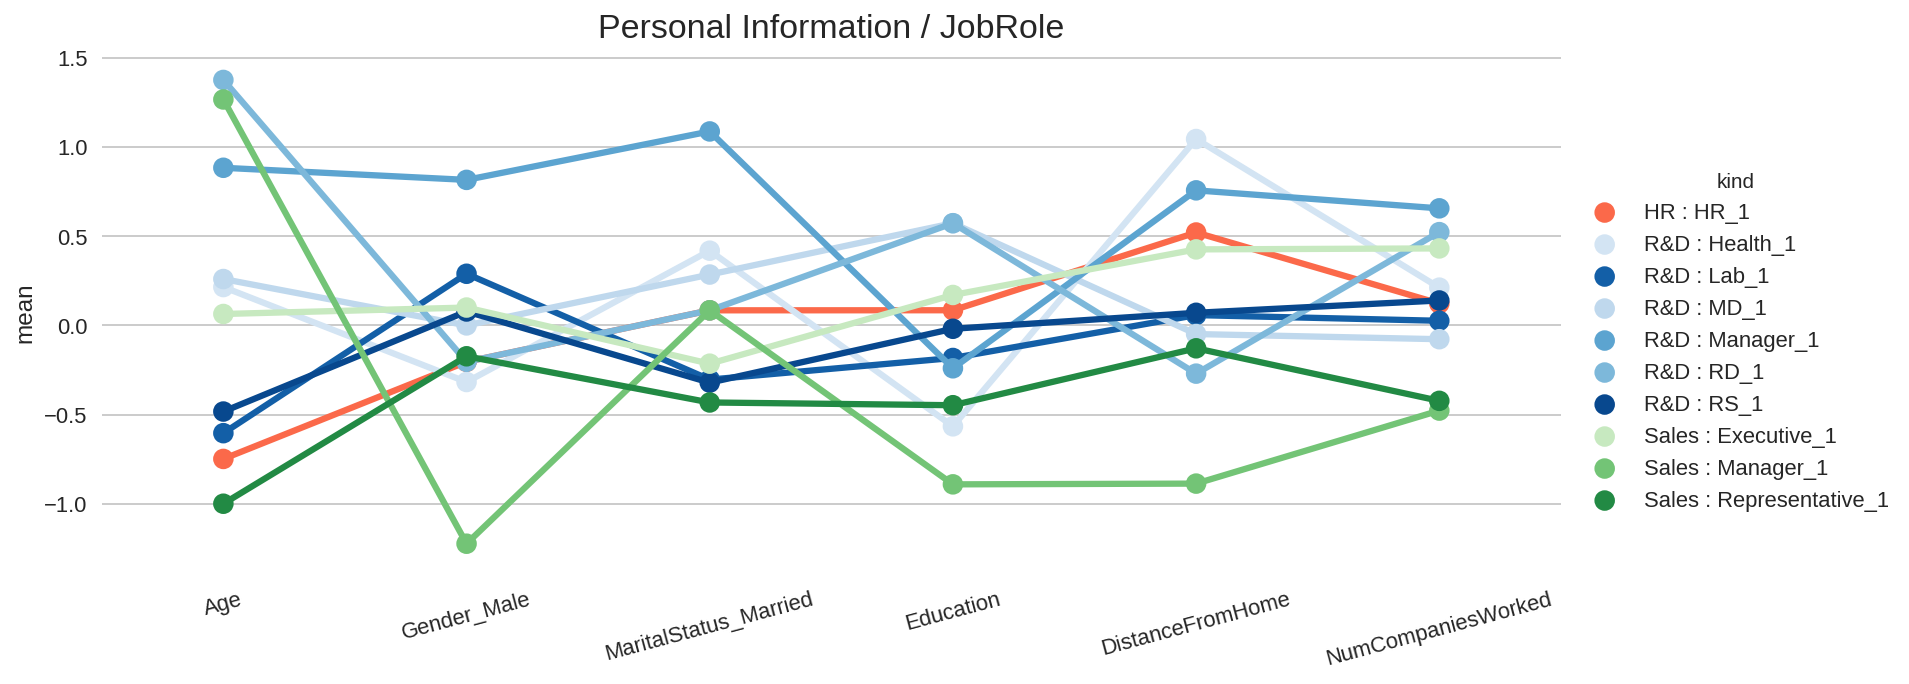

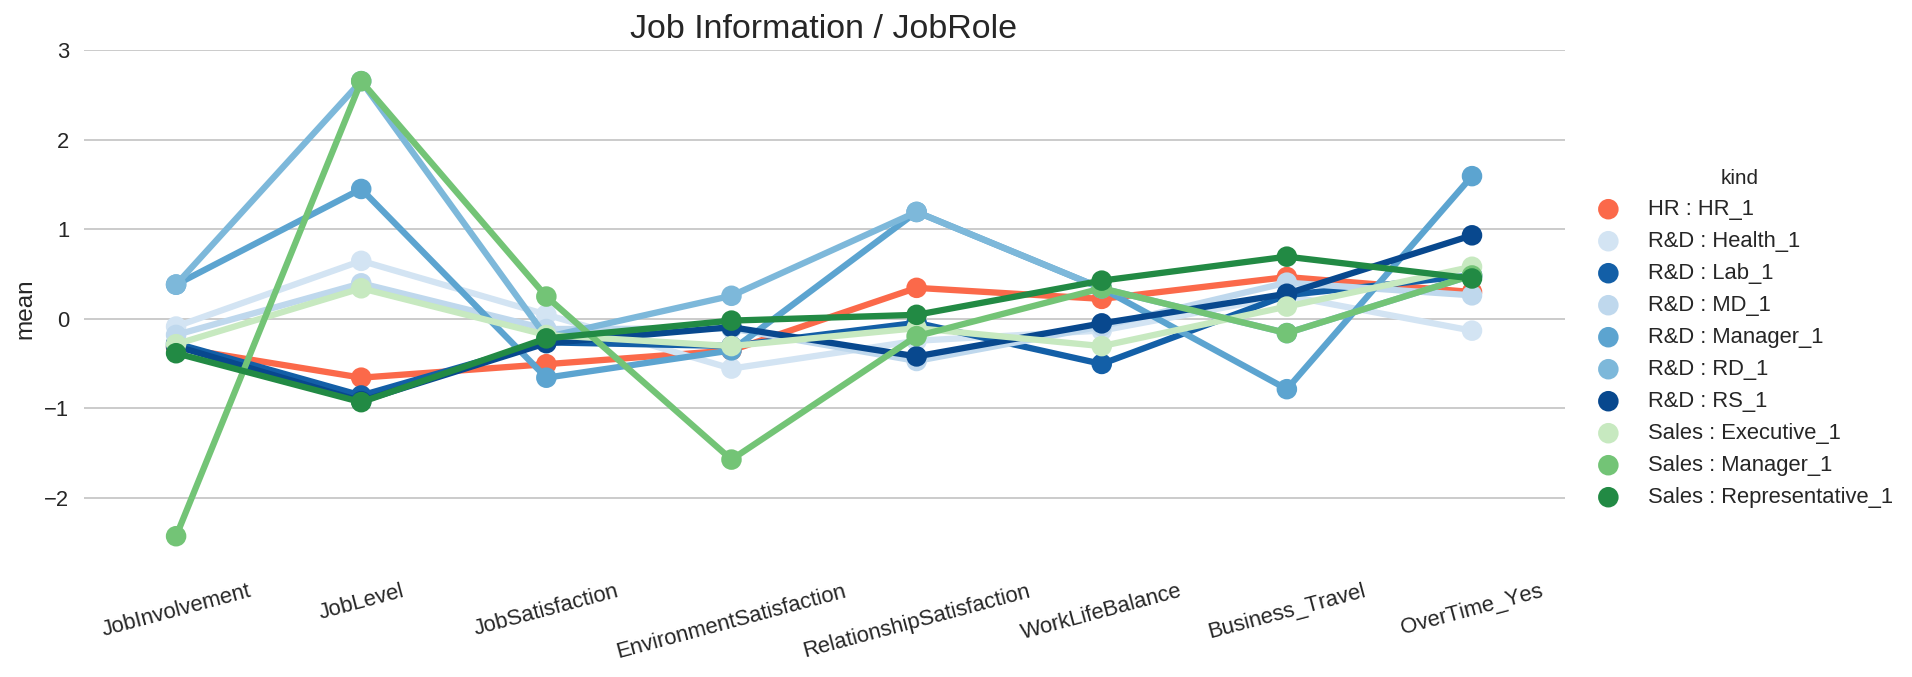

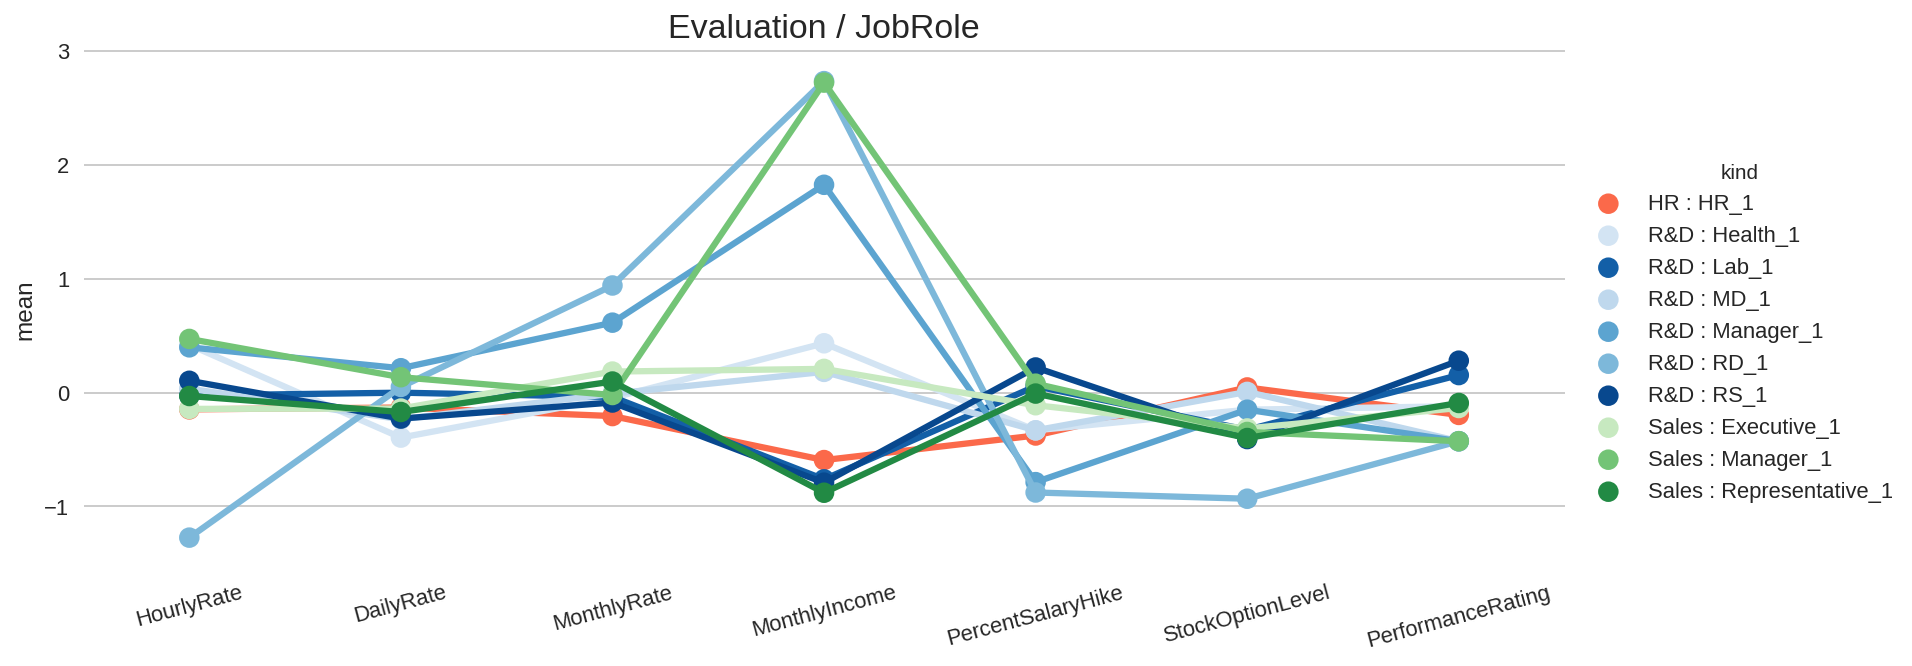

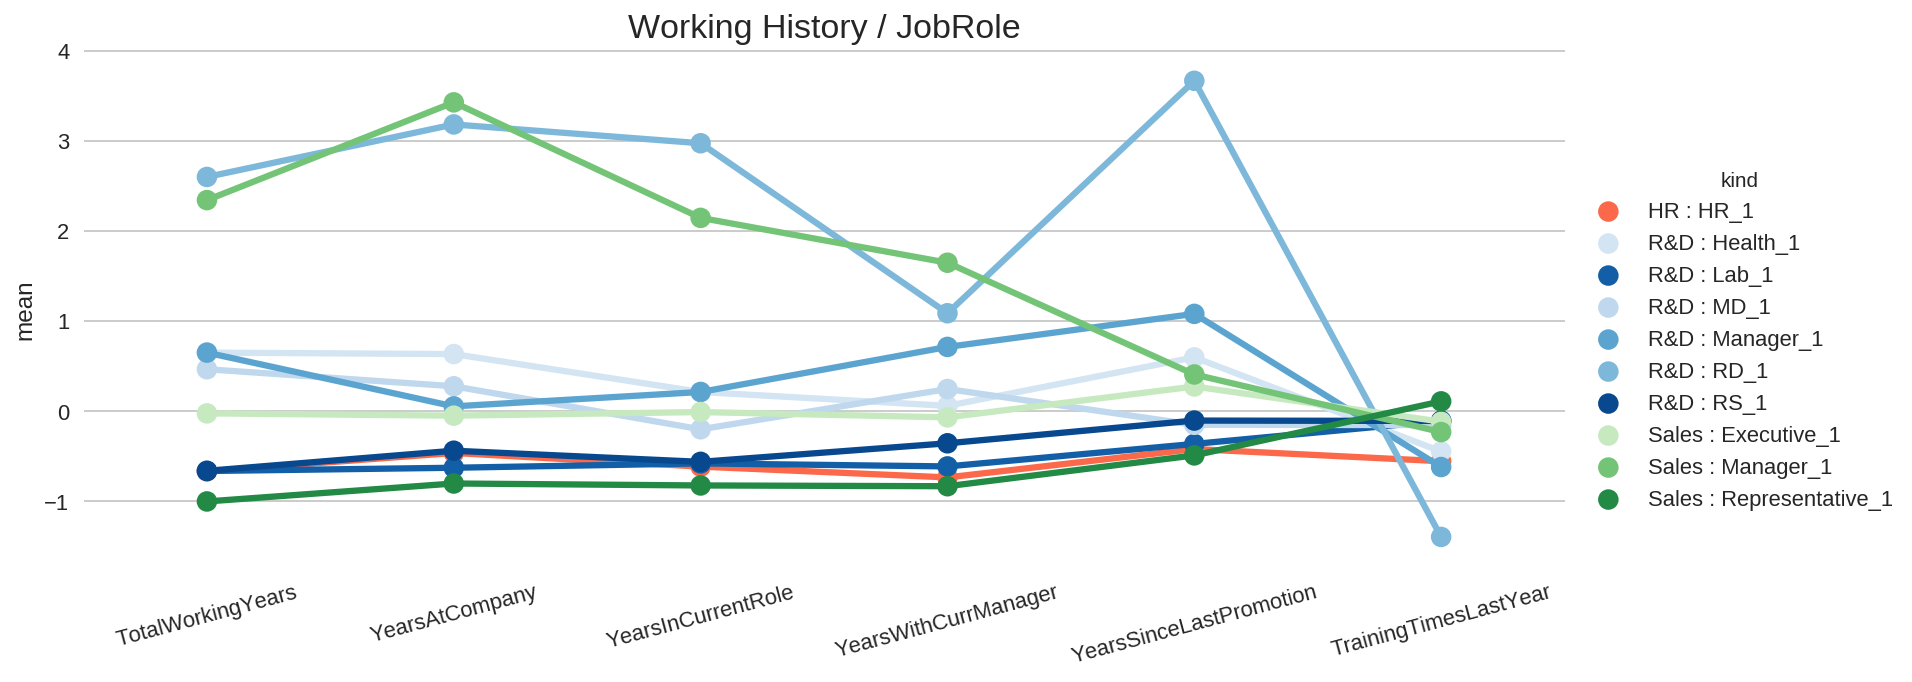

In [38]:
graph_titles = ["Personal Information / JobRole", "Job Information / JobRole", "Evaluation / JobRole", "Working History / JobRole"]
# for (i,title) in enumerate(graph_titles):
#     feature_plot(input_data=JobRole_plots[i], palette=job_color, title=title, size=4.5, aspect=2.5,rotation=15)

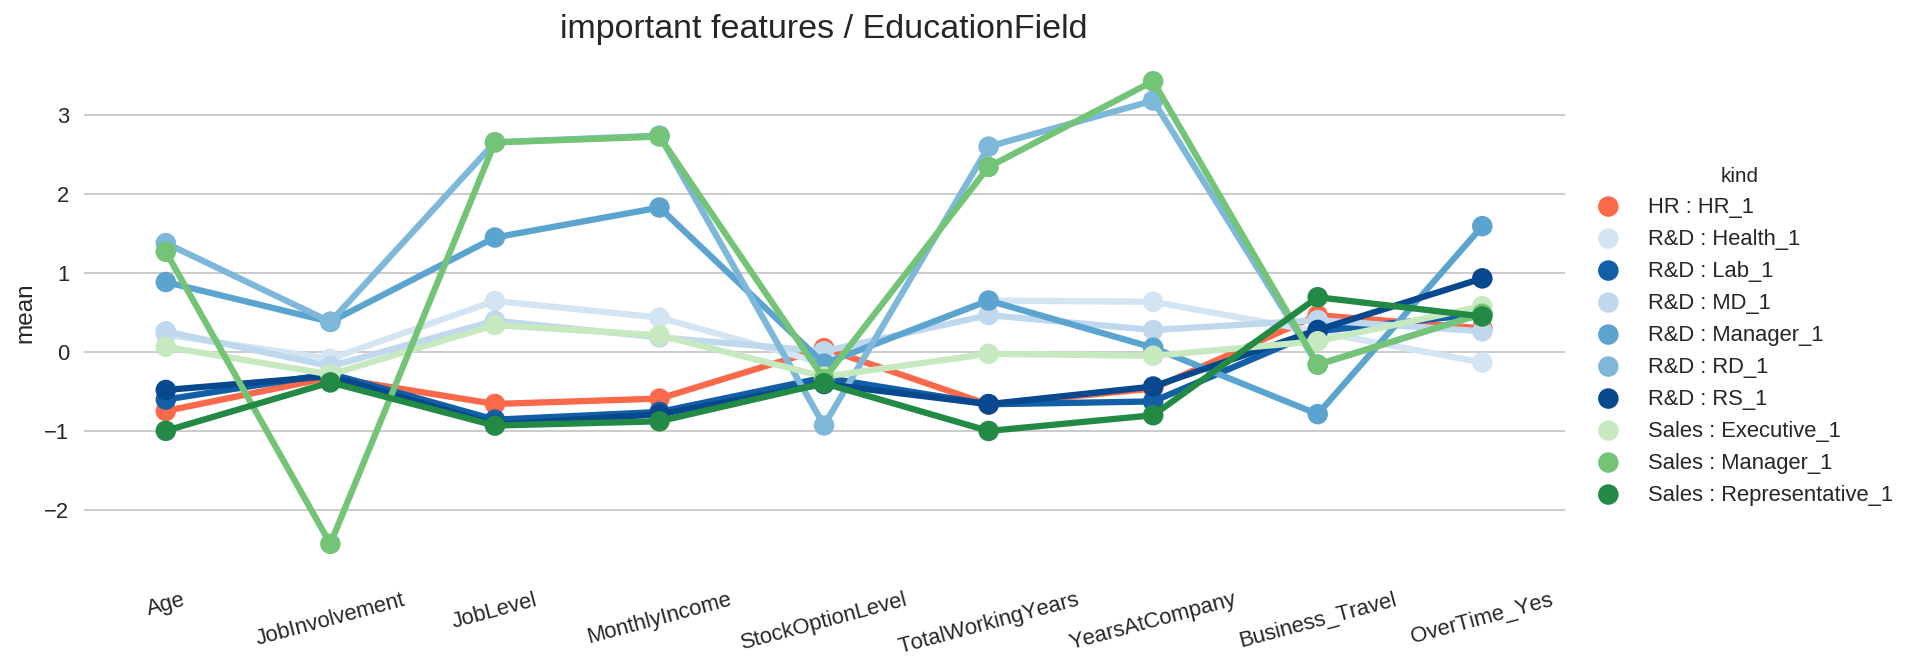

In [39]:
important_cols = ["Age", "JobInvolvement", "JobLevel", "MonthlyIncome", "StockOptionLevel", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrManager", "Business_Travel", "OverTime_Yes"]
# feature_plot(input_data=JobRole_plot.loc[important_cols], palette=job_color, title="important features / EducationField", size=4.5, aspect=2.5, rotation=15)

#### Sales
* They are young in order of representation, executive, manager.
* Representative's JobLevel and MonthlyIncome are low.
* Manager's JobLevel is very high. But JobInvovlement is very low.
* Managers work at this company very long.

#### R&D
* As Research Director and Manager are managing post, their age and their skill to job are high.
* Laboratory's and Research Scientist's JobLevel and MonthlyIncome are low. Also their working years are low too.

#### HR
* Their working years and JobLevel and MonthlyIncome are low.

### The difference of JobRole is bigger than EducationField.
* Looking at JobLevel and MonghlyIncome, Sales Representative and Research Scientists who are likely to cause Attrition have low values which are lower 1.0 point than mean. But Sales Manager, Research Director and Research Manager have high values which are higher 1.0 point than mean.
* Also there are JobRole many young employees work.
* On the other hand, PerformanceRating between JobRole is not related. So young employees may have a burdens.

# Summary
* The employees who likey to cause Attrition are young.
* Department_JobRole is more related to Attrition than EducationFiled.
* Mangement posts are not likely to cause Attrition. Lower-level positions are likely to cause Attrition.
* OverTime and BusinessTravle is important attributes which lead to cause Attrition.
* As young employees are not mature to job, this is happend.

# 2. Predict Attrition using machine learning methods.

#### First, we convert "EducationFiled" and "Department_JobRole" into dummy variables.

In [40]:
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
Data.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel,Department_JobRole,MaritalStatus_Married,Gender_Male,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,Life Sciences,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,Sales : Sales Executive,0,0,1,1
1,49,279,8,1,Life Sciences,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,2,Research & Development : Research Scientist,1,1,0,0
2,37,1373,2,2,Other,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,Research & Development : Laboratory Technician,0,1,1,1
3,33,1392,3,4,Life Sciences,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,2,Research & Development : Research Scientist,1,0,1,0
4,27,591,2,1,Medical,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,Research & Development : Laboratory Technician,1,1,0,0


In [42]:
Data = pd.concat([Data, pd.get_dummies(Data[["EducationField", "Department_JobRole"]])], axis=1)
Data.drop(["EducationField", "Department_JobRole"], axis=1, inplace=True)
Data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel,MaritalStatus_Married,Gender_Male,OverTime_Yes,Attrition_Yes,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_JobRole_Human Resources : Human Resources,Department_JobRole_Human Resources : Manager,Department_JobRole_Research & Development : Healthcare Representative,Department_JobRole_Research & Development : Laboratory Technician,Department_JobRole_Research & Development : Manager,Department_JobRole_Research & Development : Manufacturing Director,Department_JobRole_Research & Development : Research Director,Department_JobRole_Research & Development : Research Scientist,Department_JobRole_Sales : Manager,Department_JobRole_Sales : Sales Executive,Department_JobRole_Sales : Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
cols = Data.columns.drop("Attrition_Yes")
features = Data[cols]
target = Data[["Attrition_Yes"]]

In [44]:
kf = KFold(features.shape[0], random_state=1, n_splits=10)

In [45]:
target = target.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=1)

# We predict by LogisticRegression, RandomForest and SVM.

In [46]:
# define score function
def print_clf_score(input_predictions):
    pd.DataFrame(confusion_matrix(Data["Attrition_Yes"], input_predictions), index=["true_0", "true_1"], columns=["pred_0","pred_1"])
    print(classification_report(Data["Attrition_Yes"], input_predictions))
    print("accuracy: ", accuracy_score(Data["Attrition_Yes"], input_predictions))
    print("f1_score: ", f1_score(Data["Attrition_Yes"], input_predictions))
    print("roc_auc: ", roc_auc_score(Data["Attrition_Yes"], input_predictions))

### LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
predictions = cross_val_predict(lr, features, target, cv=kf)
print_clf_score(pd.Series(predictions))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1233
          1       0.79      0.32      0.46       237

avg / total       0.87      0.88      0.85      1470

accuracy:  0.876870748299
f1_score:  0.459701492537
roc_auc:  0.653931442299


In [48]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
lr_coef = pd.DataFrame(lr.coef_, columns=X_train.columns, index=["feature"]).transpose()
lr_coef.reindex([lr_coef["feature"].abs().sort_values(ascending=False).index]).head(10)

,feature
OverTime_Yes,1.881611
Business_Travel,0.998621
Department_JobRole_Sales : Sales Representative,0.862947
EducationField_Technical Degree,0.567136
StockOptionLevel,-0.551122
Gender_Male,0.501758
Department_JobRole_Research & Development : Laboratory Technician,0.501388
Department_JobRole_Research & Development : Research Scientist,-0.459949
PerformanceRating,0.439141
JobInvolvement,-0.433356


### RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=5)
predictions1 = cross_val_predict(rf, features, target, cv=kf)
print_clf_score(pd.Series(predictions1))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92      1233
          1       0.83      0.16      0.27       237

avg / total       0.86      0.86      0.82      1470

accuracy:  0.859863945578
f1_score:  0.274647887324
roc_auc:  0.57903436098


In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=5,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [52]:
rf_imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["feature"])
rf_imp.reindex([rf_imp["feature"].abs().sort_values(ascending=False).index]).head(10)

,feature
MonthlyIncome,0.070677
Age,0.060025
DailyRate,0.056503
OverTime_Yes,0.053620
TotalWorkingYears,0.051188
MonthlyRate,0.050500
DistanceFromHome,0.049895
HourlyRate,0.047694
YearsAtCompany,0.042445
PercentSalaryHike,0.035483


### SVM RBF

#### First, standadize the data.

In [53]:
features_copy = features.copy()

In [54]:
ordinal_cols = features_copy.columns[:24]
features_copy[ordinal_cols] = (features_copy[ordinal_cols] - features_copy[ordinal_cols].mean()) / features_copy[ordinal_cols].std()

In [55]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(features_copy, target, test_size=0.1, random_state=1)

#### gridsearch

In [56]:
tuned_parameters = {
 'C': [pow(2, x) for x in range(-5, 16)] , 'gamma': [pow(2, x) for x in range(-15, 4)], 'kernel': ['rbf']
                   }

In [57]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
svc = svm.SVC()
model = GridSearchCV(svc, tuned_parameters, cv=10, scoring="f1", n_jobs=8)
model.fit(X_train_c, y_train_c)
print("model.best_score_", model.best_score_)
print("model.best_params_", model.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


model.best_score_ 0.5735047533420108
model.best_params_ {'C': 256, 'gamma': 0.00048828125, 'kernel': 'rbf'}


#### 10-fold cross validation using best parameters.

In [58]:
svc = svm.SVC(kernel="rbf", C=256, gamma=pow(2,-11))
predictions2 = cross_val_predict(svc, features_copy, target, cv=kf)
print_clf_score(pd.Series(predictions2))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1233
          1       0.78      0.44      0.57       237

avg / total       0.88      0.89      0.88      1470

accuracy:  0.890476190476
f1_score:  0.566037735849
roc_auc:  0.709759052224


# Conclusion

We can predict the employee who will cause Attrition in 89% accuracy.